In [1]:
from datasets import list_datasets, load_dataset

In [12]:
import pandas as pd

In [33]:
import matplotlib.pyplot as plt

In [2]:
all_datasets = list_datasets()
print(f'There are {len(all_datasets)} datasets currently available on the Hub.')
print(f'The first 10 are: {all_datasets[:10]}')

C:\Users\nitin\AppData\Local\Temp\ipykernel_12064\3074329163.py:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There are 126298 datasets currently available on the Hub.
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [3]:
for dataset in all_datasets:
    if 'python' in dataset:
        print(dataset)
    elif 'data' in dataset:
        if 'science' in dataset:
            print(dataset)
    elif 'artificial' in dataset:
        if 'intelligence' in dataset:
            print(dataset)
    elif 'machine' in dataset:
        if 'learning' in dataset:
            print(dataset)
    elif 'industry' in dataset:
        print(dataset)

Fraser/python-lines
Fraser/python-state-changes
bigscience-catalogue-data-dev/lm_code_github-eval_subset
espejelomar/code_search_net_python_10000_examples
formermagic/github_python_1m
notional/notional-python
sia-precision-education/pile_python
thomwolf/github-python
h4iku/coconut_python2010
h4iku/coconut_python2010_preprocessed
bigscience-data/roots_ar_uncorpus
bigscience-data/roots_en_uncorpus
bigscience-data/roots_es_uncorpus
bigscience-data/roots_fr_uncorpus
bigscience-data/roots_zh_uncorpus
jamescalam/reddit-python
loubnabnl/tokenized-github-code-python
bigscience-catalogue-data/bias-shades
bigscience-data/roots_ar_arabench
bigscience-data/roots_ar_labr
bigscience-data/roots_ar_wikinews
bigscience-data/roots_ar_wikiquote
bigscience-data/roots_ar_wikiversity
bigscience-data/roots_ar_wiktionary
bigscience-data/roots_ca_catalan_government_crawling
bigscience-data/roots_ar_wikisource
bigscience-data/roots_ca_enriched_conllu_ancora_for_ml_training
bigscience-data/roots_ar_wikipedia
big

## Loading Datasets

We start with loading the emotions dataset from huggingface_hub for the text_classification

In [4]:
emotion = load_dataset('emotion')
emotion

c:\anaconda3\Lib\site-packages\datasets\load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = emotion['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
len(train_ds)

16000

In [8]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [9]:
train_ds.column_names

['text', 'label']

In [15]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [13]:
pd.DataFrame(train_ds[:10])

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2


In [16]:
pd.DataFrame(train_ds['text'][:10])

,0
0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...
9,i feel romantic too


## Local Datasets

In [17]:
wizard_of_oz = load_dataset('text', data_files='../data/wizard_of_oz.txt')
wizard_of_oz

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 5275
    })
})

In [19]:
wizard_of_oz['train'][:10]

{'text': ['\ufeffDorothy and the Wizard in Oz',
  '',
  '',
  'A Faithful Record of Their Amazing Adventures',
  'in an Underground World; and How with the',
  'Aid of Their Friends Zeb Hugson, Eureka',
  'the Kitten, and Jim the Cab-Horse,',
  'They Finally Reached the',
  'Wonderful Land of Oz',
  '']}

## Data From Url

In [23]:
dataset_url = 'https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt'

In [25]:
!python -m wget {dataset_url}


Saved under train.txt


In [27]:
!python -m head -n 1 train.txt

c:\anaconda3\python.exe: No module named head


In [28]:
emotions_local = load_dataset('csv', data_files='train.txt', sep=';', names=['text', 'label'])
emotions_local

Generating train split: 0 examples [00:00, ? examples/s]

Failed to read file 'C:\GitHub\learning_transformer\nlp_with_transformers\train.txt' with error <class 'pandas.errors.ParserError'>: Error tokenizing data. C error: Expected 2 fields in line 9, saw 11



DatasetGenerationError: An error occurred while generating the dataset

In [29]:
dataset_url = 'https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1'
emotions_remote = load_dataset('csv', data_files=dataset_url, sep=';', names=['text', 'label'])
emotions_remote

Generating train split: 0 examples [00:00, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset

## From Datasets to DataFrames

In [30]:
emotion.set_format(type='pandas')
df = emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [31]:
def label_int2str(row):
    return emotion['train'].features['label'].int2str(row)

In [32]:
df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Looking at Class Distribution

A dataset with a skewed class distribution might require a different treatment in terms of the training loss and evaluation metrics than a balanced one.

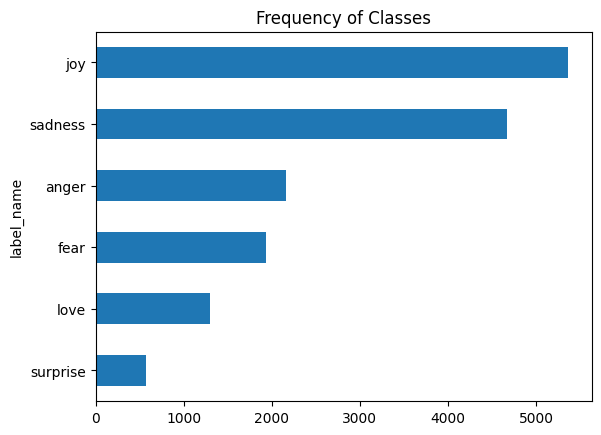

In [34]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

Class imbalance problem like above can be handled using a library such as Imbalanced-learn.

### How long are our Tweets?

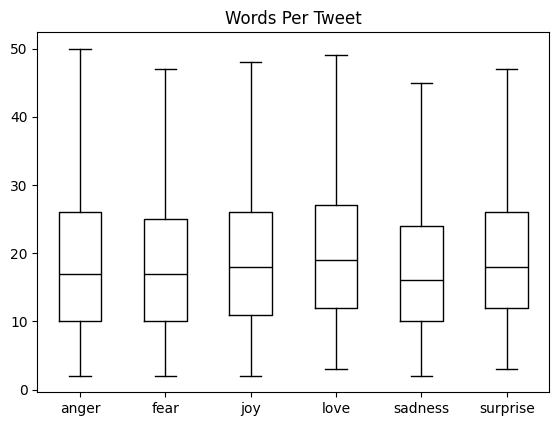

In [37]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by='label_name', grid=False, showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

In [38]:
emotion.reset_format()
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

### From Text to Tokens

Transformers models like ``DistilBERT`` that we are going to use, cannot receive raw string as input; instead they assume the text has been tokenized and encoded as numerical vectors.

**Tokenization** is the step of breaking down a string into the atomic units used in the model. There are several tokenization strategies one can adopt, and the optimal splitting of words into subunits is usually learned from the corpus. Before looking at tokenizers used for DistilBERT, let's consider two extreme cases: character and word tokenization.